<a href="https://colab.research.google.com/github/nyasalohiya/Houses_Analyses-/blob/main/housecsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#must use when using colab
from google.colab import files
uploaded = files.upload()

Saving houses.csv to houses.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
data_new = pd.read_csv('houses.csv')


In [ ]:
columns_to_drop=['link','property_id','description','furnishDetails','features']#number of columns from csv
data_cleaned=data_new.drop(columns=columns_to_drop)
data_cleaned.info()
data_cleaned.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    1044 non-null   object
 1   society          453 non-null    object
 2   price            968 non-null    object
 3   rate             1005 non-null   object
 4   area             1044 non-null   object
 5   areaWithType     987 non-null    object
 6   bedRoom          987 non-null    object
 7   bathroom         987 non-null    object
 8   balcony          987 non-null    object
 9   additionalRoom   589 non-null    object
 10  address          1031 non-null   object
 11  noOfFloor        967 non-null    object
 12  facing           674 non-null    object
 13  agePossession    987 non-null    object
 14  nearbyLocations  913 non-null    object
 15  rating           907 non-null    object
dtypes: object(16)
memory usage: 130.6+ KB


,property_name,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [ ]:
import numpy as np
#funciton to covert price to numeric value based on lac or corre
def converted_price(price_str):
  #check is price is missing
  if pd.isna(price_str):
    return np.nan

  #remove commas and convert to lowercase
  price_str=price_str.replace(',','').lower()

  #extract numeric part of the price
  numeric_part=pd.to_numeric(price_str.split()[0],errors='coerce')
  if 'lac' in price_str:
    return numeric_part*1e5 #1 lac
  elif 'crore' in price_str:
    return numeric_part*1e7 #1 crore
  else:
    return numeric_part #if no unit is found, return number as numeric part
data_cleaned['numeric_price']=data_cleaned['price'].apply(converted_price)
data_cleaned.head(5)
#fill  misisng values with mean of new numeric_rpice column
data_cleaned['numeric_price'].fillna(data_cleaned['numeric_price'].mean(),inplace=True)
data_cleaned.head(5)


<ipython-input-47-3913c703a4ea>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['numeric_price'].fillna(data_cleaned['numeric_price'].mean(),inplace=True)


,property_name,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,rating,numeric_price
0,5 Bedroom House for sale in Sector 70A Gurgaon,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...","['Environment5 out of 5', 'Lifestyle4 out of 5...",52500000.0
1,5 Bedroom House for sale in Sector 21A Faridabad,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,NaN,57000000.0
2,10 Bedroom House for sale in Sushant Lok Phase 1,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","['Environment5 out of 5', 'Lifestyle5 out of 5...",21000000.0
3,21 Bedroom House for sale in Sector 54 Gurgaon,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","['Environment4 out of 5', 'Lifestyle5 out of 5...",50000000.0
4,12 Bedroom House for sale in Sushant Lok Phase 1,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...","['Environment5 out of 5', 'Lifestyle5 out of 5...",30000000.0


In [ ]:
#fill missing values incategorial coulmn with most frewuenct
data_cleaned.fillna({'society':data_cleaned['society'].mode()},inplace=True)
data_cleaned.fillna({'facing':data_cleaned['facing'].mode()},inplace=True)


In [ ]:
#extract numeric values from bedroom and bathroom
data_cleaned['bedRoom']=pd.to_numeric(data_cleaned['bedRoom'].str.extract('(\d+)')[0],errors='coerce')
data_cleaned['bathroom']=pd.to_numeric(data_cleaned['bathroom'].str.extract('(\d+)')[0],errors='coerce')


In [ ]:
data_cleaned.drop_duplicates(inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    1023 non-null   object 
 1   society          439 non-null    object 
 2   price            955 non-null    object 
 3   rate             985 non-null    object 
 4   area             1023 non-null   object 
 5   areaWithType     974 non-null    object 
 6   bedRoom          974 non-null    float64
 7   bathroom         974 non-null    float64
 8   balcony          974 non-null    object 
 9   additionalRoom   578 non-null    object 
 10  address          1010 non-null   object 
 11  noOfFloor        955 non-null    object 
 12  facing           662 non-null    object 
 13  agePossession    974 non-null    object 
 14  nearbyLocations  892 non-null    object 
 15  rating           887 non-null    object 
 16  numeric_price    1023 non-null   float64
dtypes: float64(3), obje

In [ ]:
#maximum house price
#note max works with numbers only so first remove commas if that exists
max_price=data_cleaned['numeric_price'].max()
max_price

315000000.0

In [ ]:
houses_more_than_3_bedrooms = data_cleaned[data_cleaned['bedRoom'] > 3].shape[0]
houses_more_than_3_bedrooms

696

In [ ]:
#avg price of bathroom more than 2
avg_price_more_than_2_bathrooms = data_cleaned[data_cleaned['bathroom'] > 2]['numeric_price'].mean()
avg_price_more_than_2_bathrooms

np.float64(57278466.6777798)

In [ ]:
# Count of houses facing North
north_facing_houses = data_cleaned[data_cleaned['facing'] == 'North'].shape[0]
north_facing_houses


110

In [ ]:
#count of houses by facing directions
facing_counts = data_cleaned['facing'].value_counts()
facing_counts
data_cleaned.shape

(1023, 17)

In [ ]:
data_cleaned['area_numeric']=pd.to_numeric(data_cleaned['area'].str.extract('(\d+)')[0],errors='coerce')
min_area=data_cleaned['area_numeric'].min()
min_area

4

In [ ]:
#avg price per square feet
data_cleaned['price_per_sqft']=data_cleaned['numeric_price']/data_cleaned['area_numeric']
avg_price_per_sqft=data_cleaned['price_per_sqft'].mean()
avg_price_per_sqft

np.float64(317857.29985606176)

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1043
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    1023 non-null   object 
 1   society          439 non-null    object 
 2   price            955 non-null    object 
 3   rate             985 non-null    object 
 4   area             1023 non-null   object 
 5   areaWithType     974 non-null    object 
 6   bedRoom          974 non-null    float64
 7   bathroom         974 non-null    float64
 8   balcony          974 non-null    object 
 9   additionalRoom   578 non-null    object 
 10  address          1010 non-null   object 
 11  noOfFloor        955 non-null    object 
 12  facing           662 non-null    object 
 13  agePossession    974 non-null    object 
 14  nearbyLocations  892 non-null    object 
 15  rating           887 non-null    object 
 16  numeric_price    1023 non-null   float64
 17  area_numeric     10

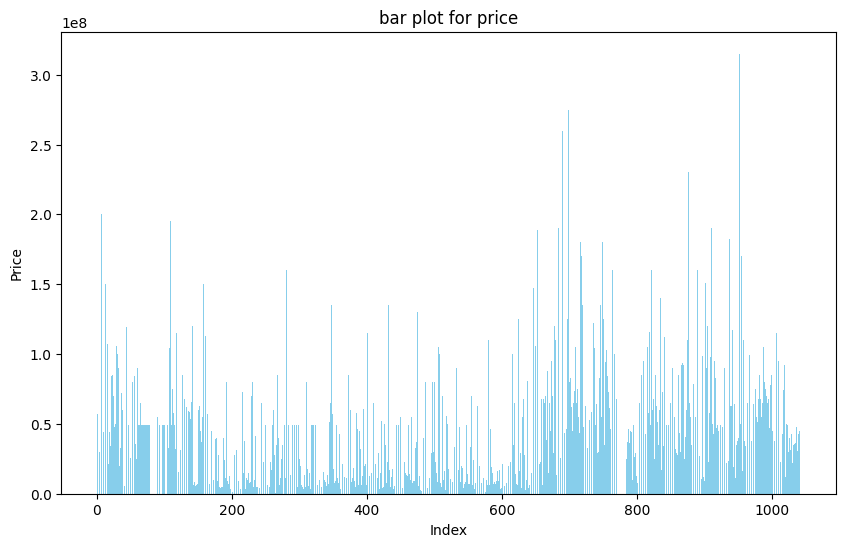

In [ ]:
#re import necessary libraries and load datasets again for analysis
#reassessing the cleaned data for univariate analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


data_cleaned =data_cleaned
print(data_cleaned.info())

# plot for price
plt.figure(figsize=(10, 6))
plt.bar(data_cleaned.index, data_cleaned['numeric_price'],color='skyblue')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('bar plot for price')
plt.show()


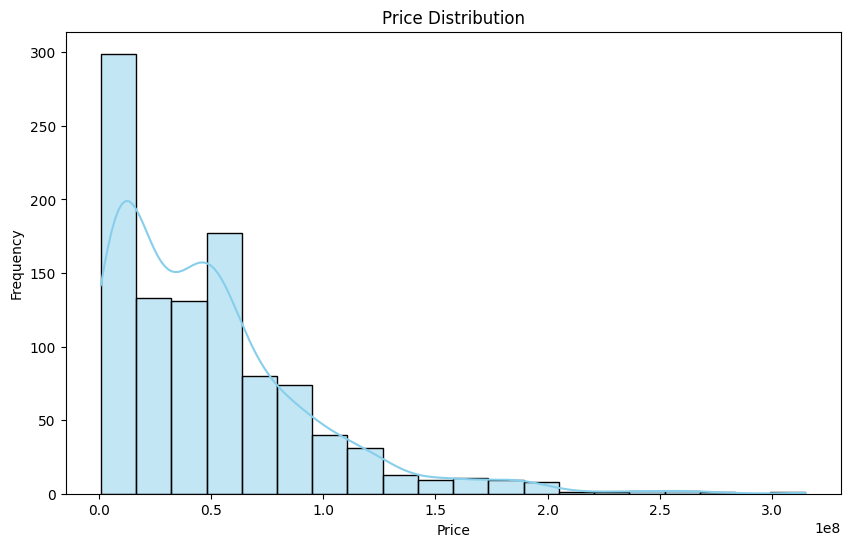

In [ ]:
#histogram for 'price' using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['numeric_price'], bins=20, kde=True, color='skyblue')#kde means line trendline and bins means number of bars you want
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

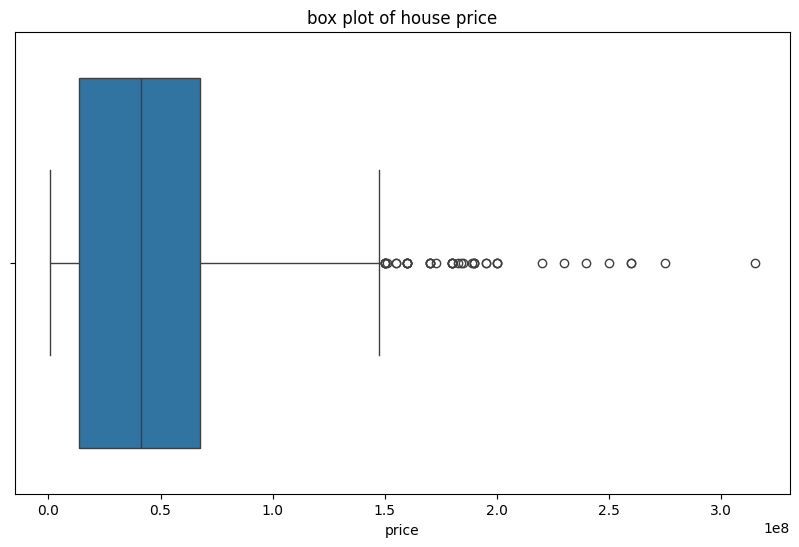

In [ ]:
#bix polot using seaborn
plt.figure(figsize=(10,6))
sns.boxplot(data=data_cleaned,x='numeric_price')
plt.title("box plot of house price")
plt.xlabel('price')
plt.show()

   bedRoom  numeric_price
0      1.0   1.211184e+07
1      2.0   1.260636e+07
2      3.0   2.863945e+07


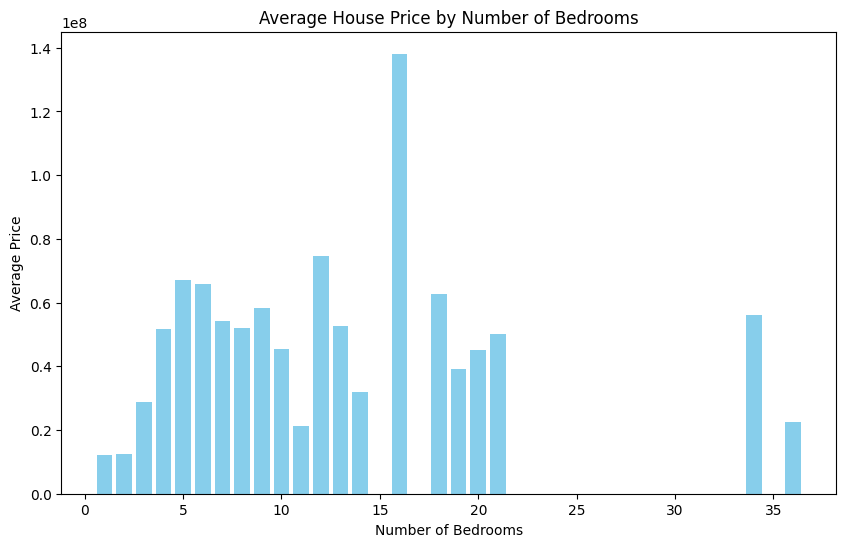

In [ ]:
grouped_data=data_cleaned.groupby('bedRoom')['numeric_price'].mean().reset_index()
print(grouped_data.head(3))
plt.figure(figsize=(10,6))
plt.bar(grouped_data['bedRoom'],grouped_data['numeric_price'],color='skyblue')
plt.title('Average House Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


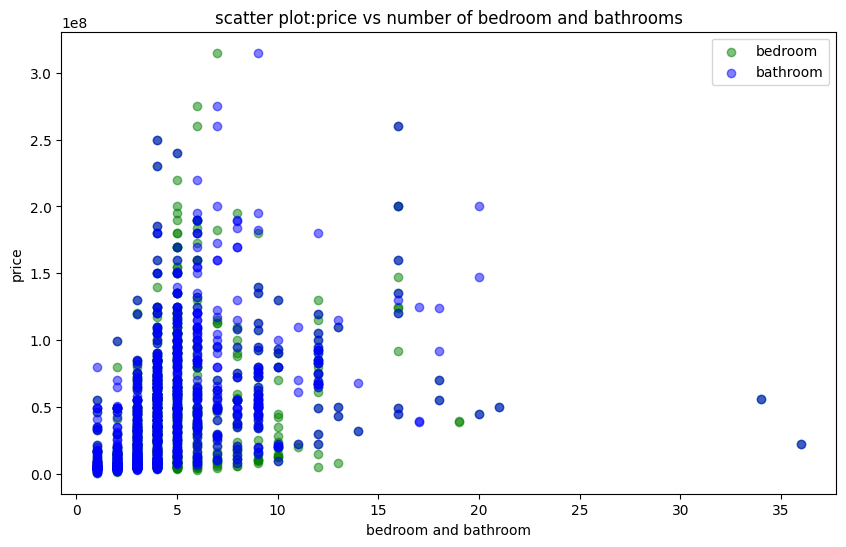

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data_cleaned['bedRoom'],data_cleaned['numeric_price'],alpha=0.5,color='green',label='bedroom')
plt.scatter(data_cleaned['bathroom'],data_cleaned['numeric_price'],alpha=0.5,color='blue',label='bathroom')
plt.title('scatter plot:price vs number of bedroom and bathrooms')
plt.xlabel('bedroom and bathroom')
plt.ylabel('price')
plt.legend()
plt.show()

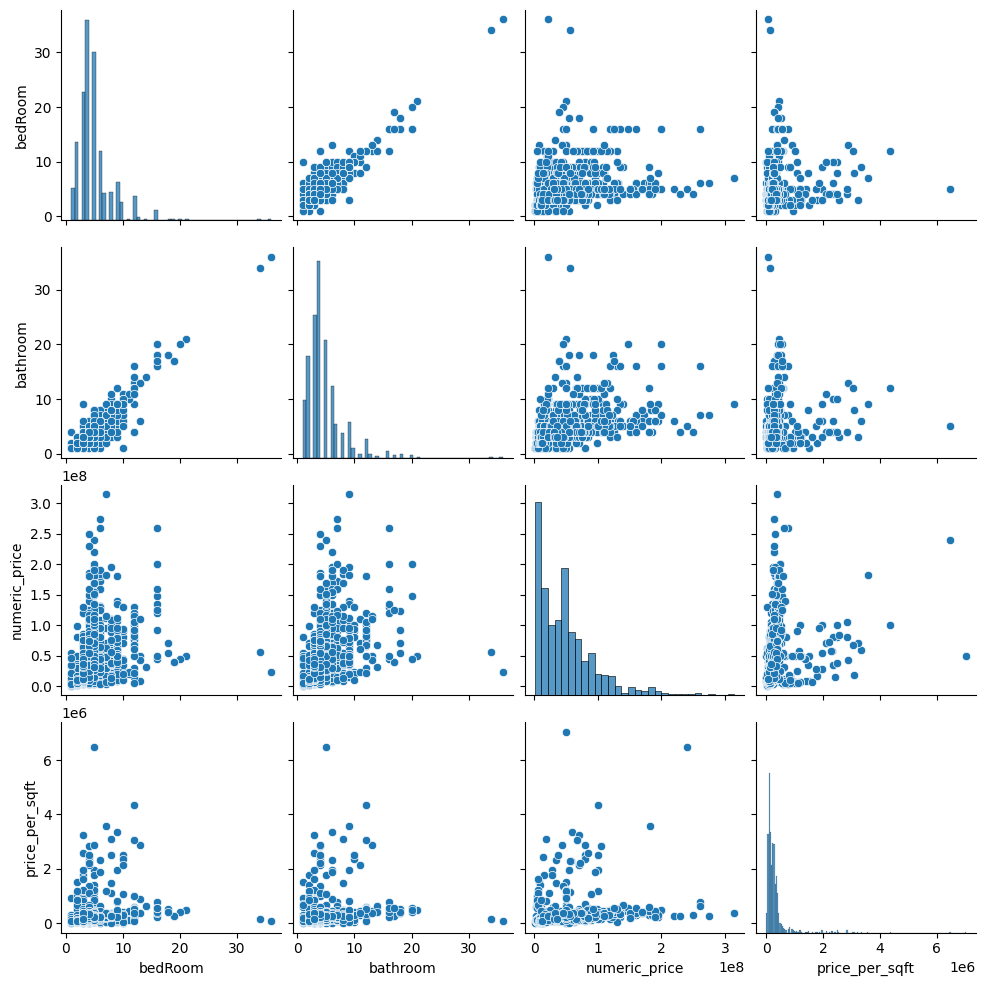

In [ ]:
#pair plot
data_cleaned['price_per_sqft']=data_cleaned['numeric_price']/data_cleaned['area_numeric']
sns.pairplot(data_cleaned[['numeric_price','bedroom','bathroom','price_per_sqft']])
plt.show()

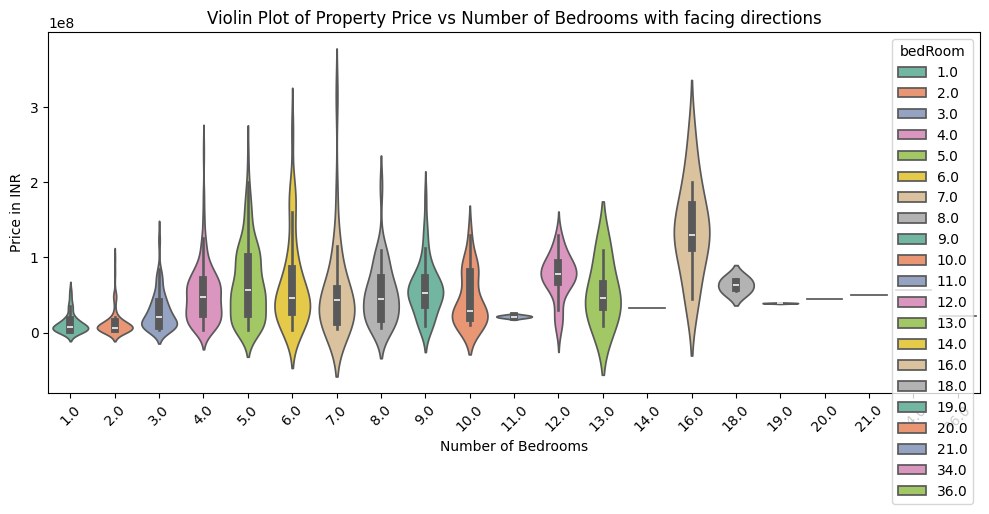

In [ ]:
#violin chart
plt.figure(figsize=(10,5))
sns.violinplot(data=data_cleaned,x='bedRoom',y='numeric_price',hue='bedRoom',palette='Set2')
plt.title('Violin Plot of Property Price vs Number of Bedrooms with facing directions')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in INR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()